In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci

In [2]:
with open('alzheimers.dat') as f:
    l = f.readlines()
    l = list(map(lambda x:x.replace('\n','').split(),l))
f.close()
df = pd.DataFrame(np.int32(l[1:]),columns=l[0])

In [13]:
b_0 = np.array([1.804, 0.165])
s2_0 = 0.015**2

In [76]:
def f(g,s2=s2_0,b=b_0,i=1):
    g_array = np.array([g]*5)
    Lambda = np.exp(b[1]*np.array(range(1,6))+b[0]*np.ones(5)+g_array)
    Phi = sci.norm.pdf(g,loc=0,scale=np.sqrt(s2))
    y_i = np.array(df[df.subject==i]['words'])
    Sigma = (y_i-Lambda)@np.array(range(1,6))
    Pi = np.prod([sci.poisson.pmf(y_i[j],mu=Lambda[j]) for j in range(5)])
    return Pi*Sigma*Phi

In [78]:
f(0,s2_0,b_0,1)

0.00044596804976986736

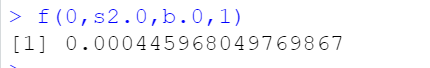

In [95]:
x = np.linspace(-.07,.085,1000)

In [96]:
y = [f(x_i) for x_i in x]

In [97]:
x_ymax = x[y.index(max(y))]

In [98]:
x1 = np.linspace(-.07,x_ymax,500)
x2 = np.linspace(x_ymax,.085,500)

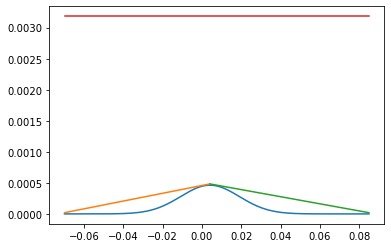

In [122]:
plt.plot(x,y)
plt.plot(x1,(f(x_ymax)-f(-.07))/(x_ymax+.07)*(x1-x_ymax)+f(x_ymax)+2e-5)
plt.plot(x2,(f(.085)-f(x_ymax))/(.085-x_ymax)*(x2-x_ymax)+f(x_ymax)+2e-5)
plt.plot(x,sci.cauchy.pdf(x,loc=0,scale=100))

In [91]:
max(y)

0.007192015264850052